Define Problem Statement ?

AI-Driven Energy Forecasting and Anomaly Detection for HVAC Systems used in buildings.

collecting data :  https://github.com/Dr-Dina-M-Ibrahim/A-dataset-for-residential-buildings-energy-consumption-with-statistical-and-machine-learning-analysi/blob/main/dataset%20for%20buildings%20energy%20consumption%20of%203840%20records.xlsx

Using supervised learning for Forecasting Energy. Model used is~ Linear Regression

Using Unsupervised learning for Anomaly Detection. Model used is~ K-means Clustering

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load the data

In [45]:

file_path = r"C:\Users\sarth\Downloads\dataset for buildings energy consumption of 3840 records.xlsx"
df = pd.read_excel(file_path)

print(df.shape)
print(df.head())
print(df.info())


(3847, 29)
   Unnamed: 0  Building Area m2  Floor Height m  Exterior Win Area  \
0         NaN            184.53             2.8            23.2485   
1         NaN            184.53             2.8            23.2485   
2         NaN            184.53             2.8            23.2485   
3         NaN            184.53             2.8            23.2485   
4         NaN            184.53             2.8            23.2485   

   Opaque Exterior Wall Area  \
0                    209.237   
1                    209.237   
2                    209.237   
3                    209.237   
4                    209.237   

   WWR %\n = 10-90% of Exterior Win (D) from Opaque Wall (E)  \
0                                               10.0           
1                                               10.0           
2                                               10.0           
3                                               10.0           
4                                               10.0   

Cleaning

In [46]:

print(df.isnull().sum())

df = df.drop_duplicates()

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])


Unnamed: 0                                                   3847
Building Area m2                                                7
Floor Height m                                                  7
Exterior Win Area                                               7
Opaque Exterior Wall Area                                       7
WWR %\n = 10-90% of Exterior Win (D) from Opaque Wall (E)       7
Win U-value (W/m2K)                                             7
Roof U-value (W/m2K)                                            7
Wall U-value (W/m2K)                                            7
Cooling MWh                                                     7
Heating MWh                                                     7
Total Energy MWh                                                7
Cooling KWh/m2.yr                                               7
Heating KWh/m2.yr                                               7
Total Energy KWh/m2.yr                                          7
Unnamed: 1

       Unnamed: 0  Building Area m2  Floor Height m  Exterior Win Area  \
count         0.0       3840.000000     3840.000000        3840.000000   
mean          NaN        165.195000        2.900000         110.079035   
std           NaN         19.337518        0.100013          63.116830   
min           NaN        145.860000        2.800000          19.630100   
25%           NaN        145.860000        2.800000          62.045200   
50%           NaN        165.195000        2.900000         110.702050   
75%           NaN        184.530000        3.000000         164.321350   
max           NaN        184.530000        3.000000         217.370500   

       Opaque Exterior Wall Area  \
count                3840.000000   
mean                  110.079065   
std                    63.116831   
min                    19.630100   
25%                    62.045200   
50%                   110.702100   
75%                   164.321425   
max                   217.370500   

       W

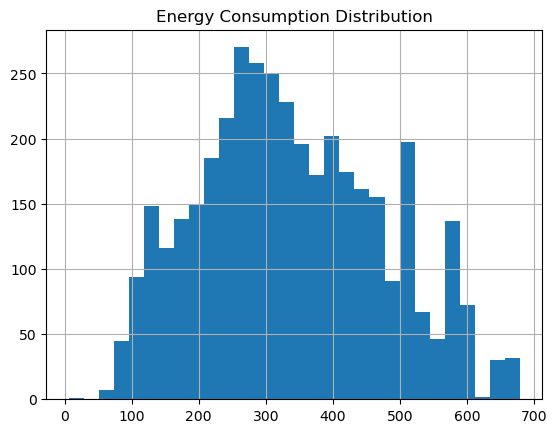

In [47]:
# Summary
print(df.describe())

# Quick distribution plots
import matplotlib.pyplot as plt

df['Total Energy KWh/m2.yr'].hist(bins=30)
plt.title("Energy Consumption Distribution")
plt.show()

In [48]:

if 'Date' in df.columns:
    df['Hour'] = df['Date'].dt.hour
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month


Save cleaned dataset

In [50]:
df.to_csv("cleaned_energy_consumption.csv", index=False)
